In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
train_df=pd.read_csv(r"D:\\semester 4\\machine learning\\project\\annotations.csv")
train_df

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0
...,...,...,...,...,...,...,...,...
6159,056_1_0018_1_j.png,122,94,25,20,80,79,56
6160,056_1_0019_1_j.png,224,207,39,39,188,178,56
6161,056_1_0020_1_j.png,128,115,32,30,89,79,56
6162,057_1_0001_1_j.png,100,95,21,22,74,75,57


# Data Cleaning

In [3]:
train_df.isnull().sum()

file_name    0
width        0
height       0
x1           0
y1           0
x2           0
y2           0
category     0
dtype: int64

In [4]:
train_df.duplicated().sum()

0

# Discovering Data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  6164 non-null   object
 1   width      6164 non-null   int64 
 2   height     6164 non-null   int64 
 3   x1         6164 non-null   int64 
 4   y1         6164 non-null   int64 
 5   x2         6164 non-null   int64 
 6   y2         6164 non-null   int64 
 7   category   6164 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 385.4+ KB


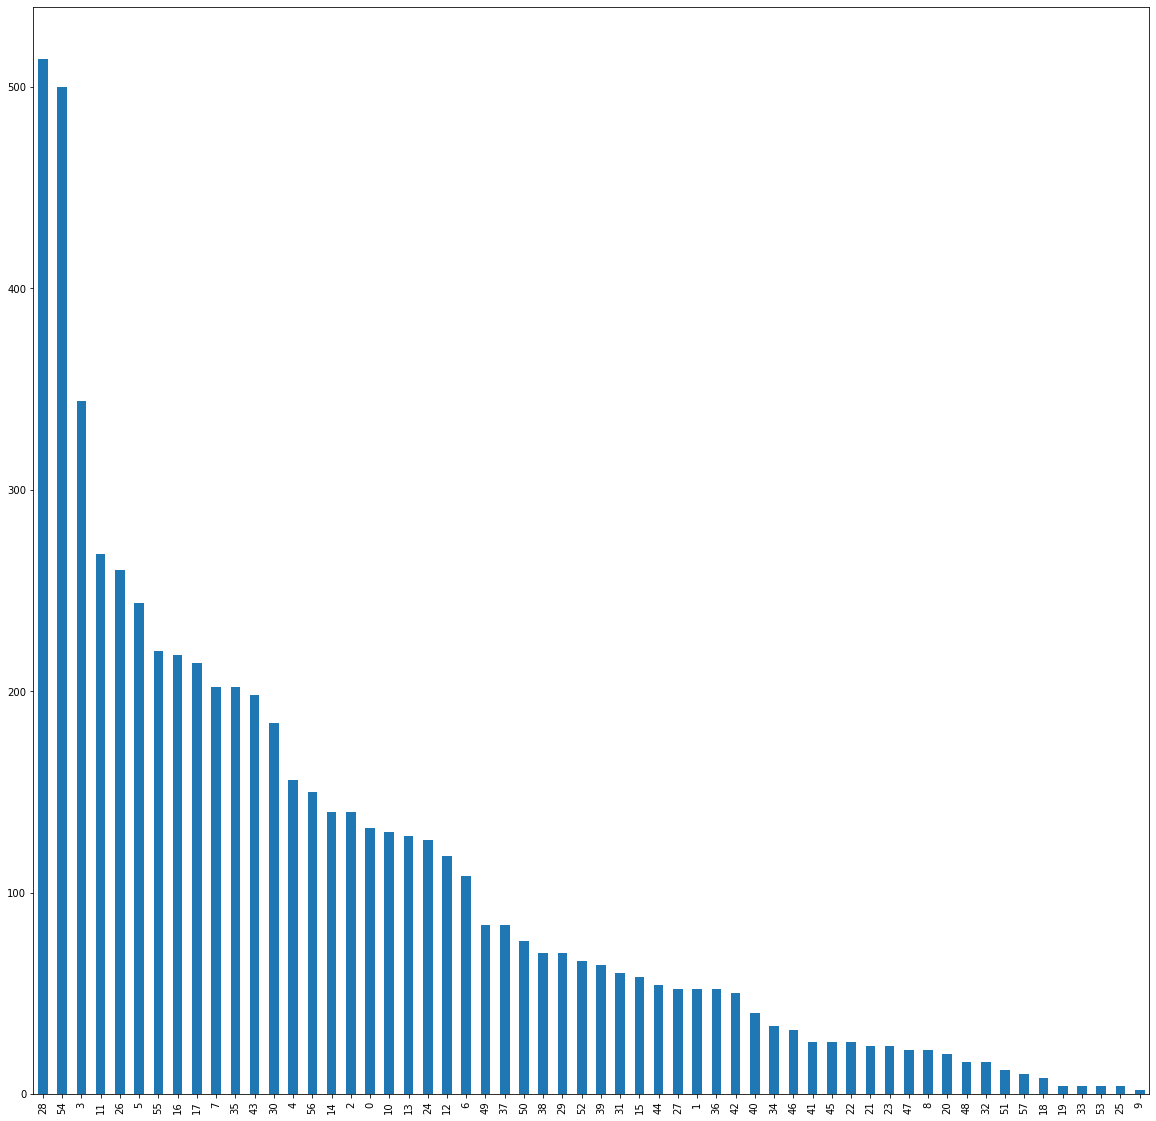

In [6]:
plt.figure(figsize=(20,20))
train_df['category'].value_counts().plot(kind='bar')
plt.show()

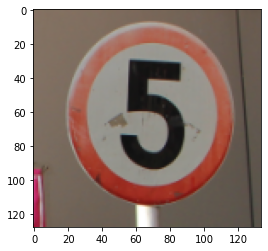

In [8]:
path=r'D:\\semester 4\\machine learning\\project\\images\\000_0001.png'
img=plt.imread(path)
plt.imshow(img)

In [9]:
img.shape

(128, 134, 3)

# Training The Data

In [10]:
train_df['category'] = train_df['category'].astype('str')

In [11]:
from keras.applications.mobilenet_v2 import  preprocess_input
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
            
            )

In [13]:
        # Train generator
train_generator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="D:\\semester 4\\machine learning\\project\\images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="training",
            batch_size=16,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            target_size=(224,244))
        print('Train generator created')
        

Found 5548 validated image filenames belonging to 58 classes.
Train generator created


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


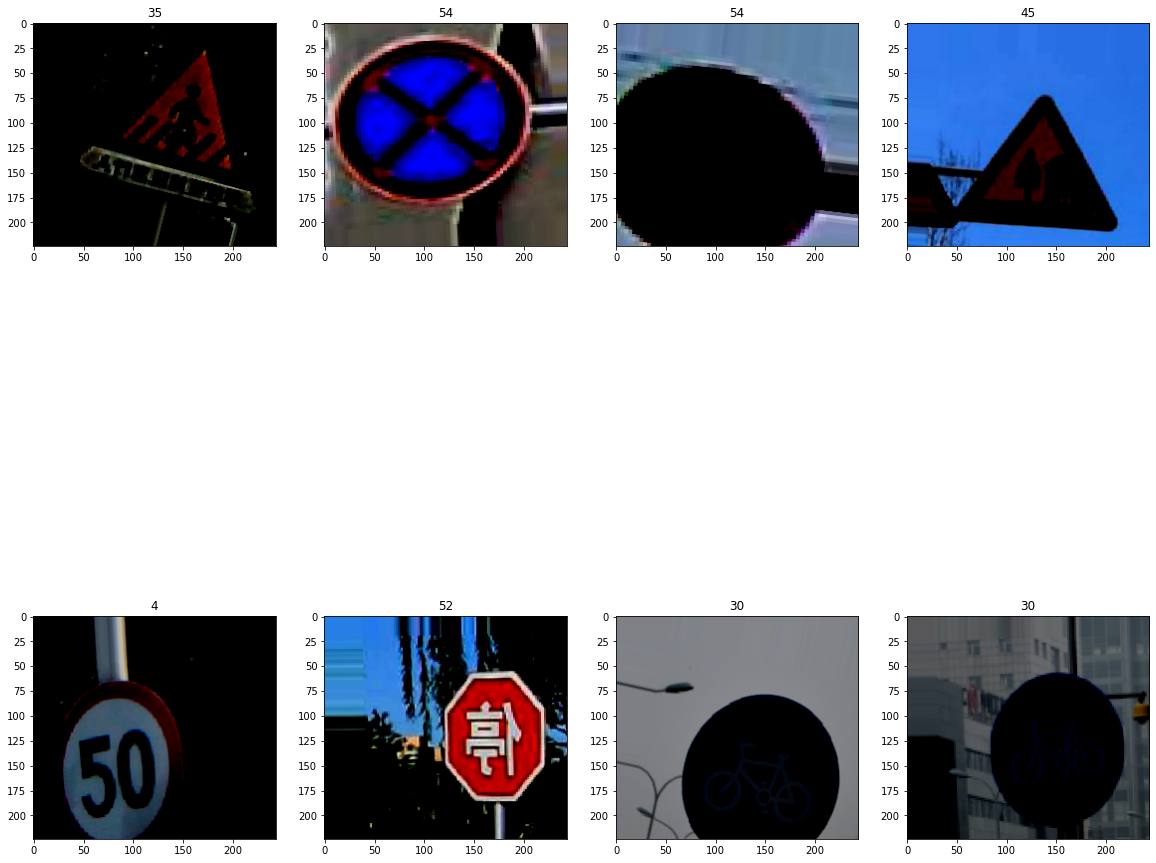

In [14]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [15]:
from keras.applications.mobilenet_v2 import  preprocess_input
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            
            )

In [18]:
# Validation generator
val_generator = validation_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="D:\\semester 4\\machine learning\\project\\images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="validation",
            batch_size=16,
            seed=42,
            shuffle=False,
            class_mode="categorical",
            target_size=(224,224)) 


Found 616 validated image filenames belonging to 58 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


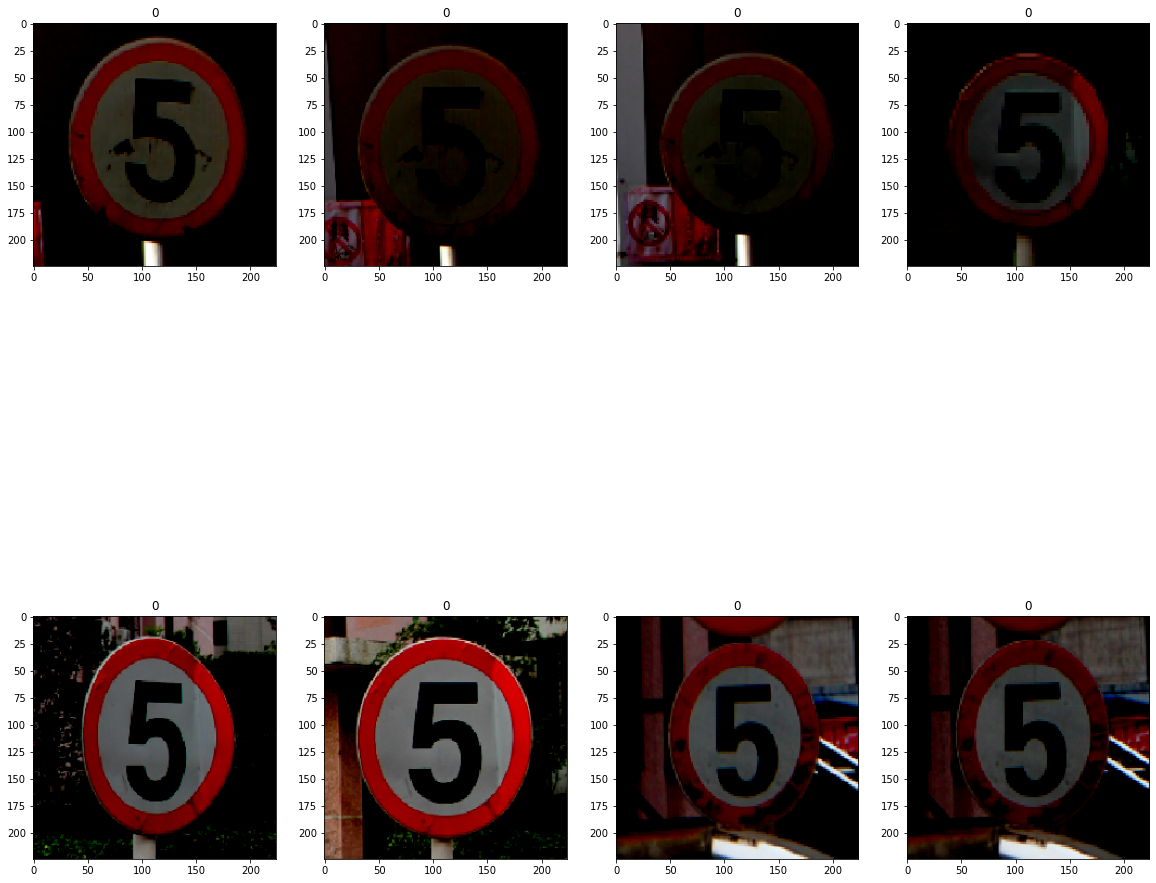

In [19]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in val_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [20]:
len(classes)

58

# 1st Algorithm ( CNN )


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [22]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [23]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('Trafic_sign.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [24]:
from keras.applications.mobilenet_v2 import MobileNetV2
mb=MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')

9406464/9406464 [==============================] - 5s 1us/step


In [25]:
mb.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [26]:
mb.trainable=False

In [27]:
Cnn_model = Sequential()
Cnn_model.add(mb)
Cnn_model.add(Flatten())
Cnn_model.add(Dense(units = 512 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 1024 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 512 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 58 , activation = 'softmax'))

In [28]:
Cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4

In [29]:
Cnn_model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [61]:
history=Cnn_model.fit(train_generator,validation_data=val_generator,epochs=5,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/5
21/21 [==============================] - ETA: 0s - loss: 1.1337 - accuracy: 0.6637
Epoch 1: val_loss did not improve from 0.08745
21/21 [==============================] - 16s 765ms/step - loss: 1.1337 - accuracy: 0.6637 - val_loss: 1.8289 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/5
21/21 [==============================] - ETA: 0s - loss: 1.2117 - accuracy: 0.6994
Epoch 2: val_loss did not improve from 0.08745
21/21 [==============================] - 16s 751ms/step - loss: 1.2117 - accuracy: 0.6994 - val_loss: 1.3351 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 3/5
21/21 [==============================] - ETA: 0s - loss: 1.1751 - accuracy: 0.6458
Epoch 3: val_loss did not improve from 0.08745
21/21 [==============================] - 16s 741ms/step - loss: 1.1751 - accuracy: 0.6458 - val_loss: 1.0668 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/5
21/21 [==============================] - ETA: 0s - loss: 1.0589 - accuracy: 0.6964
Epoch 4: val_loss did not improve from 0.08745
21/21

In [46]:
Cnn_loss,Cnn_acc=Cnn_model.evaluate(val_generator)
print("CNN Validation:", Cnn_loss, Cnn_acc)

39/39 [==============================] - 13s 323ms/step - loss: 1.1070 - accuracy: 0.6429
CNN Validation: 1.1070139408111572 0.6428571343421936


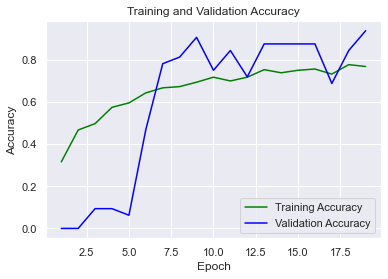

<Figure size 432x288 with 0 Axes>

In [47]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()

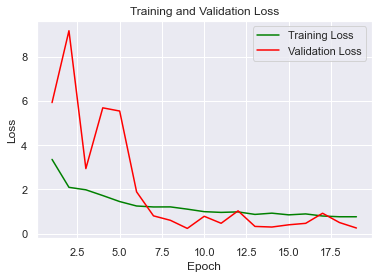

In [48]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

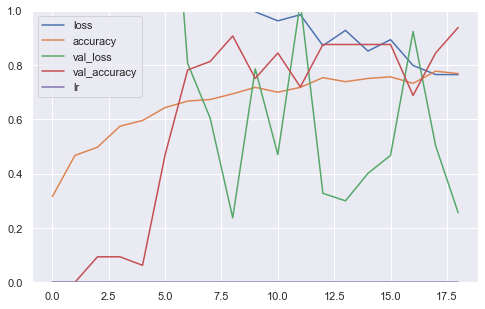

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
predictions = Cnn_model.predict(val_generator)

39/39 [==============================] - 13s 334ms/step


In [51]:
predictions[:5]

array([[9.99952555e-01, 1.32885625e-05, 7.67220030e-08, 5.76183538e-06,
        3.30649428e-08, 3.03723255e-06, 4.64585725e-07, 1.13608467e-05,
        6.46232792e-08, 3.81463053e-07, 1.63789608e-07, 4.00846645e-08,
        3.03638103e-06, 1.44817691e-09, 3.67148312e-09, 1.41187044e-08,
        1.03848175e-08, 4.41815224e-08, 1.96710474e-07, 1.78254356e-11,
        8.40066328e-09, 5.16038021e-08, 5.87699223e-09, 3.44938123e-09,
        1.98022935e-11, 1.16129932e-07, 1.29537288e-08, 6.78526249e-08,
        9.69002123e-09, 3.81907341e-08, 4.30332614e-09, 5.84519899e-09,
        9.97685312e-09, 8.85966571e-08, 3.37125279e-08, 3.60850905e-08,
        3.49471279e-08, 1.67155445e-08, 2.01649954e-07, 2.41361207e-08,
        5.22966097e-08, 2.59475641e-09, 1.63442184e-08, 4.52546516e-07,
        8.13290046e-10, 3.90493540e-07, 7.69091679e-10, 8.70123529e-09,
        2.32781190e-08, 3.58031997e-07, 1.12771448e-09, 1.62731652e-07,
        1.13277894e-08, 3.09088847e-07, 4.42365445e-06, 1.650029

In [52]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.45      0.97      0.61        30
           1       0.17      0.47      0.25        15
           2       0.67      0.50      0.57         4
           3       0.50      0.20      0.29        10
           4       0.90      0.93      0.92        30
           5       0.50      0.09      0.15        11
           6       1.00      0.60      0.75        40
           7       0.00      0.00      0.00         7
           8       0.54      0.88      0.67        16
           9       1.00      0.53      0.69        40
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.53      0.72      0.61        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.56      0.83      0.67         6
          16       1.00      0.50      0.67         4
          17       0.71    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

<AxesSubplot:>

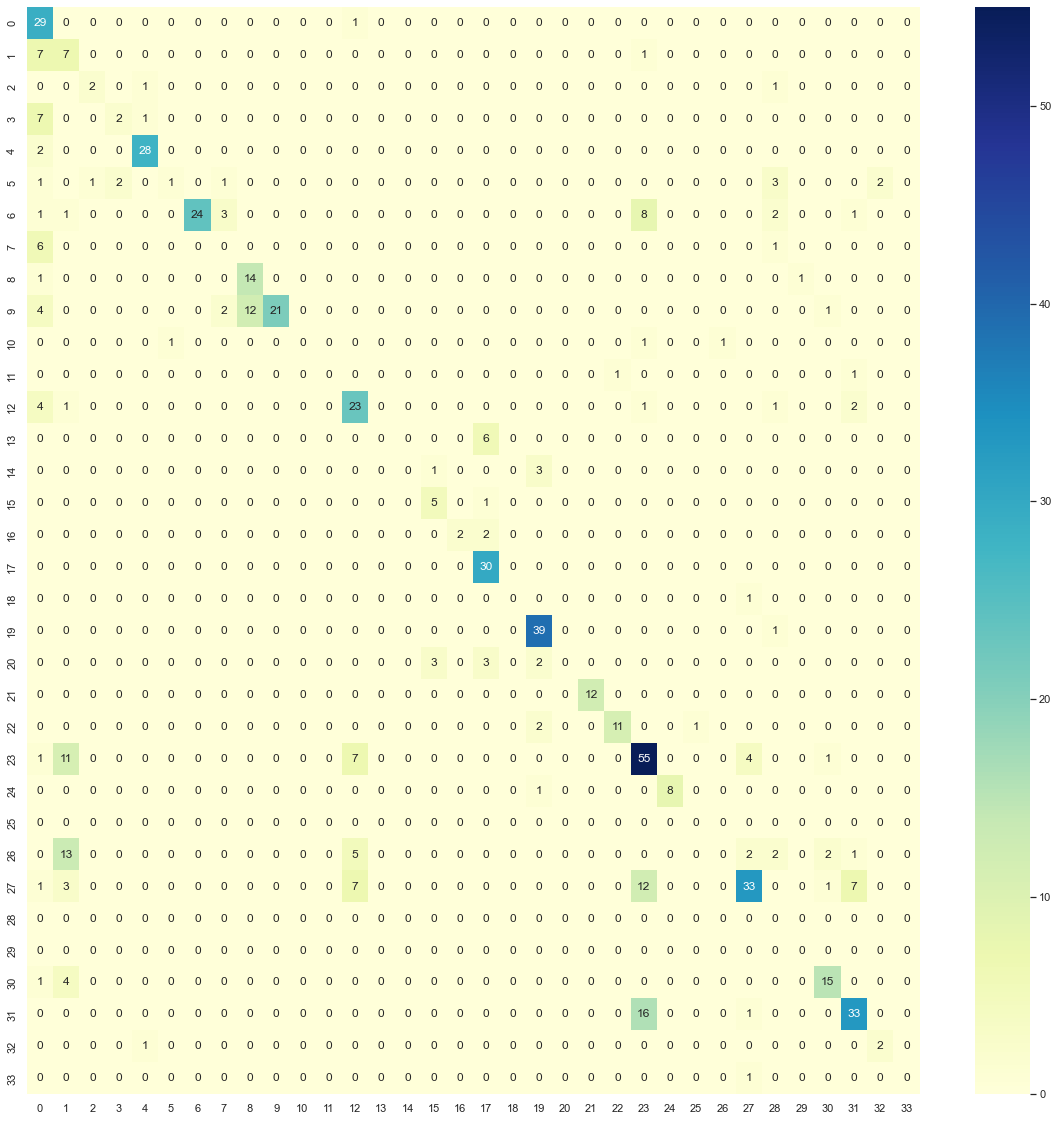

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

# 2nd Algorithm ( ANN )

In [54]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(58, activation='softmax')(x)  # Modify `num_classes` according to your task

# Create the ANN model
Ann_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
Ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
Ann_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [55]:
history2=Ann_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 3.3853 - accuracy: 0.2292
Epoch 1: val_loss did not improve from 0.23717
21/21 [==============================] - 15s 586ms/step - loss: 3.3853 - accuracy: 0.2292 - val_loss: 2.2079 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.8602 - accuracy: 0.5149
Epoch 2: val_loss did not improve from 0.23717
21/21 [==============================] - 12s 591ms/step - loss: 1.8602 - accuracy: 0.5149 - val_loss: 4.4678 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.5392 - accuracy: 0.6369
Epoch 3: val_loss did not improve from 0.23717
21/21 [==============================] - 12s 573ms/step - loss: 1.5392 - accuracy: 0.6369 - val_loss: 0.9073 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.1193 - accuracy: 0.6815
Epoch 4: val_loss did not improve from 0

In [56]:
predictions = Ann_model.predict(val_generator)

39/39 [==============================] - 13s 323ms/step


In [57]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        30
           1       0.88      1.00      0.94        15
           2       0.80      1.00      0.89         4
           3       0.83      0.50      0.62        10
           4       1.00      1.00      1.00        30
           5       0.67      0.73      0.70        11
           6       0.95      1.00      0.98        40
           7       0.88      1.00      0.93         7
           8       0.88      0.94      0.91        16
           9       1.00      0.85      0.92        40
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         2
          12       0.93      0.78      0.85        32
          13       0.75      1.00      0.86         6
          14       1.00      1.00      1.00         4
          15       1.00      0.67      0.80         6
          16       1.00      0.75      0.86         4
          17       0.96    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

<AxesSubplot:>

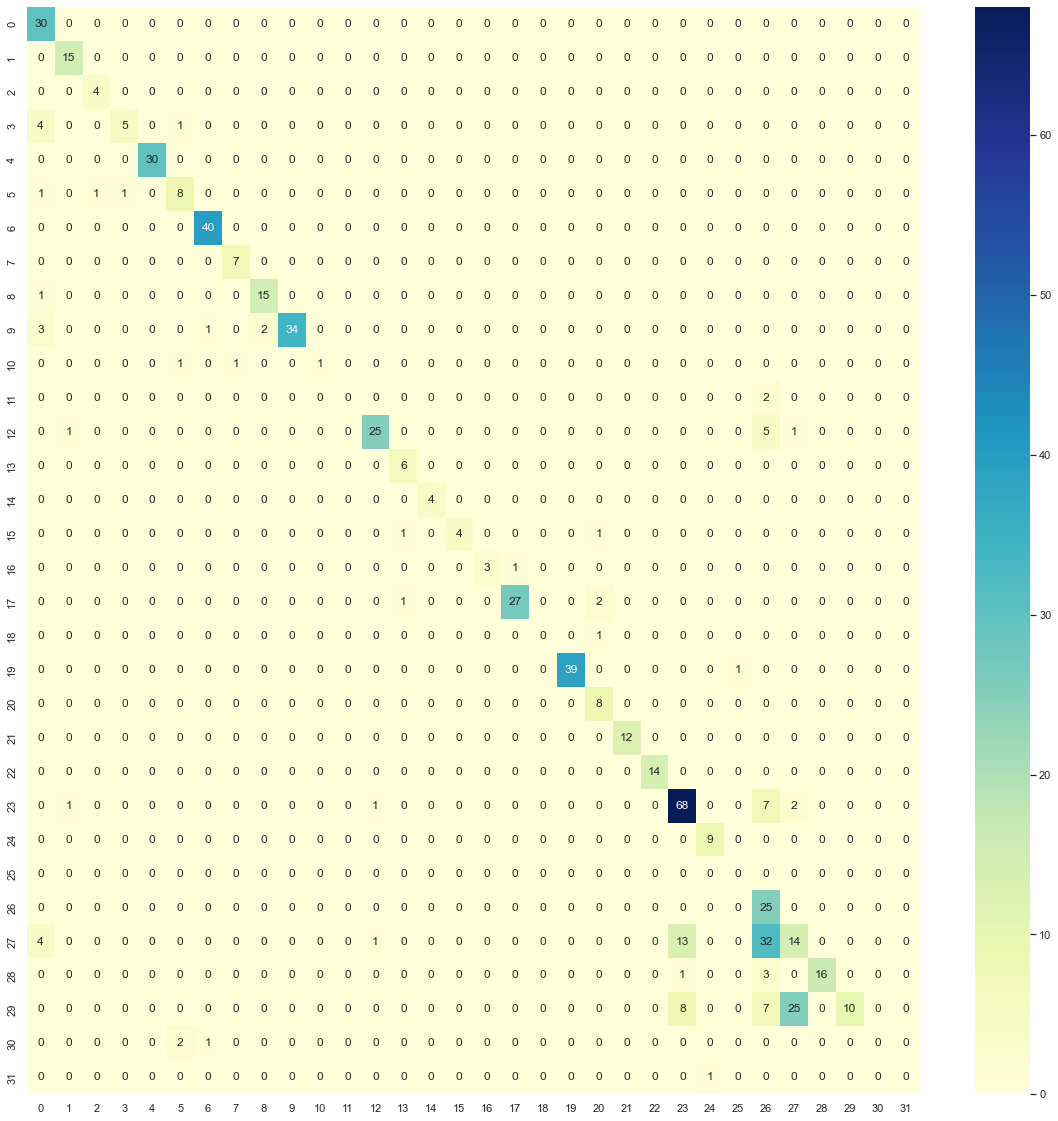

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [59]:
Ann_loss,Ann_acc=Ann_model.evaluate(val_generator)
print("ANN Validation:", Ann_loss, Ann_acc)

39/39 [==============================] - 13s 336ms/step - loss: 0.7050 - accuracy: 0.7679
ANN Validation: 0.704959511756897 0.7678571343421936


# Comparison Between The Two Algorithms

In [60]:
print("ANN vs CNN Performance Comparison:")
print("ANN Validation Accuracy:", Ann_acc)
print("CNN Validation Accuracy:", Cnn_acc)

ANN vs CNN Performance Comparison:
ANN Validation Accuracy: 0.7678571343421936
CNN Validation Accuracy: 0.6428571343421936
